In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
 import os
 os.chdir("drive/My Drive/visao-mestrado")

In [3]:
!ls

melhor_modelo_fine_tuning.h5			     vgg16_img_grande_125_epocas_batch_8.h5
menshift-imagens				     vgg16_img_grande_125_epocas_batch_8_tranfer.h5
vgg16_img_grande_125_epocas_batch_8_finetuning.h5    vgg16_img_grande_125_epocas_batch_8_zero.h5
vgg16_img_grande_125_epocas_batch_8_fine_turning.h5  vgg16_img_grande.h5


In [4]:

# PATH_IMAGENS_N = 'menshift-imagens/dataset/lamina/4_divisao_deixar_apenas_uma_imagem_por_campo_de_lamina_SEM_ERROS/Negativo/*.jpg'
# PATH_IMAGENS = 'menshift-imagens/dataset/lamina/4_divisao_deixar_apenas_uma_imagem_por_campo_de_lamina_SEM_ERROS/Positivo/*.jpg'


PATH_IMAGENS_N = 'menshift-imagens/dataset/lamina/4_divisao_deixar_apenas_uma_imagem_por_campo_de_lamina_SEM_ERROS/Negativo/*.jpg'
PATH_IMAGENS = 'menshift-imagens/dataset/lamina/4_divisao_deixar_apenas_uma_imagem_por_campo_de_lamina_SEM_ERROS/Positivo/*.jpg'


In [5]:
from skimage.io import imread_collection

leshimania = imread_collection(PATH_IMAGENS)
notleshimania = imread_collection(PATH_IMAGENS_N)

In [6]:
!ls menshift-imagens/

0_sEQSHBuGiXViDz7p.gif	 data_load.py  img_zero.png  meanshift
cm200819-110231004-.jpg  dataset       main.py


In [7]:
len(notleshimania)

72

In [8]:
from skimage.transform import resize
import numpy as np
leshimania_resized = [np.array(resize(img,(224, 224))) for img in leshimania]
notleshimania_resized = [np.array(resize(img,(224, 224))) for img in notleshimania]

In [9]:
leshimania_resized = np.array(leshimania_resized)
notleshimania_resized = np.array(notleshimania_resized)

In [10]:
EPOCHS = 125
BATCH_SIZE = 8

In [11]:
from matplotlib import pyplot as plt
def funcaoPlot(imagens, title=None):
    fig, ax = plt.subplots(1, len(imagens), figsize=(60, 60))
    for i, folha in enumerate(imagens):
        ax[i].imshow(folha, cmap="gray")
        if title:
            ax[i].set_title(title[i])
        else:
            ax[i].set_title(str(i))

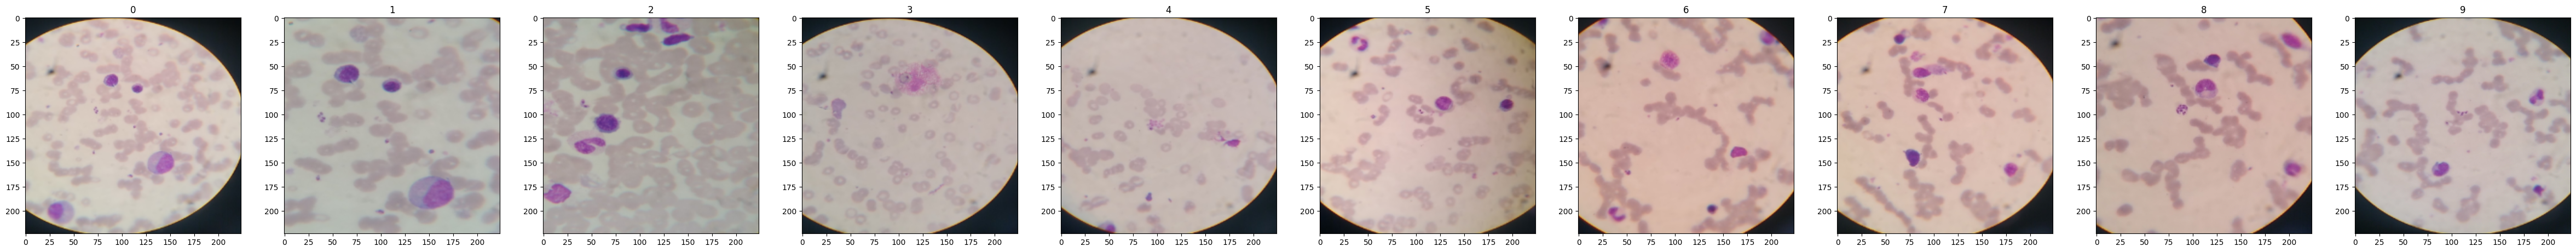

In [12]:
funcaoPlot(leshimania_resized[:10])

In [13]:
leshimania_label = np.ones(len(leshimania_resized))
notleshimania_label = np.zeros(len(notleshimania_resized))

In [14]:
from sklearn.model_selection import train_test_split

X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(leshimania_resized, leshimania_label, test_size=0.7, random_state=40)
X_train_false, X_test_false, y_train_false, y_test_false = train_test_split(notleshimania_resized, notleshimania_label, test_size=0.7, random_state=40)

X_train = np.concatenate((X_train_true,X_train_false), axis=0)
X_test = np.concatenate((X_test_true,X_test_false), axis=0)
y_train = np.concatenate((y_train_true,y_train_false), axis=0)
y_test = np.concatenate((y_test_true,y_test_false), axis=0)

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=BATCH_SIZE)

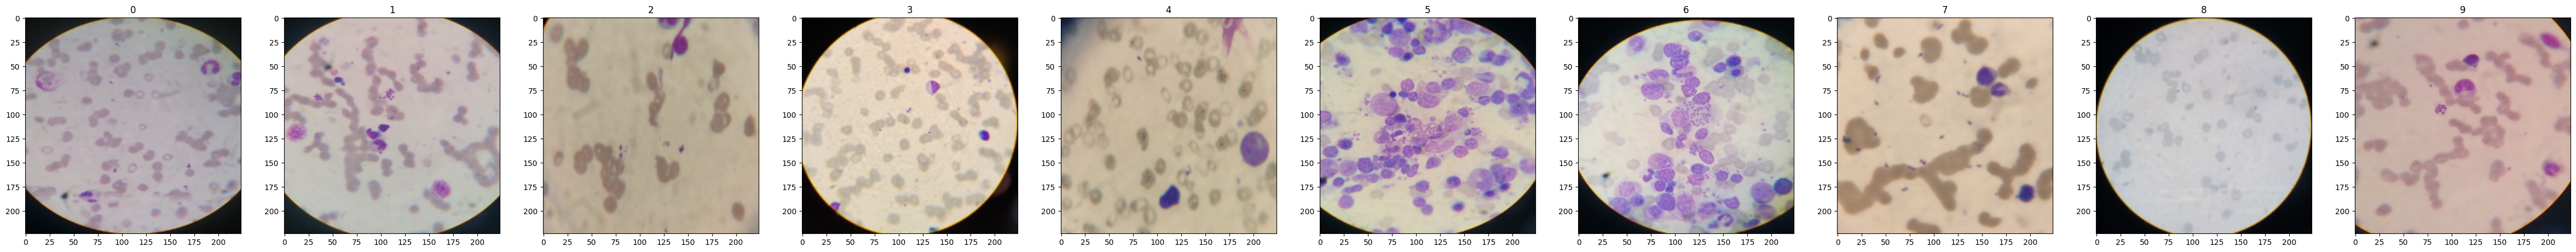

In [16]:
funcaoPlot(X_train[:10])

In [17]:
from keras.metrics import Precision, Recall, BinaryAccuracy
from keras import backend as K

# Função para calcular o F1-score
def f1_score(precision, recall):
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


Epoch 1/125
5/5 [==============================] - 17s 421ms/step - loss: 0.6949 - accuracy: 0.5500 - precision: 0.5500 - recall: 1.0000 - val_loss: 0.6929 - val_accuracy: 0.5096 - val_precision: 0.5096 - val_recall: 1.0000
Epoch 2/125
5/5 [==============================] - 1s 297ms/step - loss: 0.6932 - accuracy: 0.5500 - precision: 0.5152 - recall: 0.8947 - val_loss: 0.6932 - val_accuracy: 0.4808 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/125
5/5 [==============================] - 6s 1s/step - loss: 0.6931 - accuracy: 0.5000 - precision: 0.5714 - recall: 0.7273 - val_loss: 0.6927 - val_accuracy: 0.5192 - val_precision: 0.5192 - val_recall: 1.0000
Epoch 4/125
5/5 [==============================] - 1s 281ms/step - loss: 0.6931 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - val_loss: 0.6925 - val_accuracy: 0.5192 - val_precision: 0.5192 - val_recall: 1.0000
Epoch 5/125
5/5 [==============================] - 1s 278ms/step - loss: 0.6934 - accuracy: 0.5000 - p

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


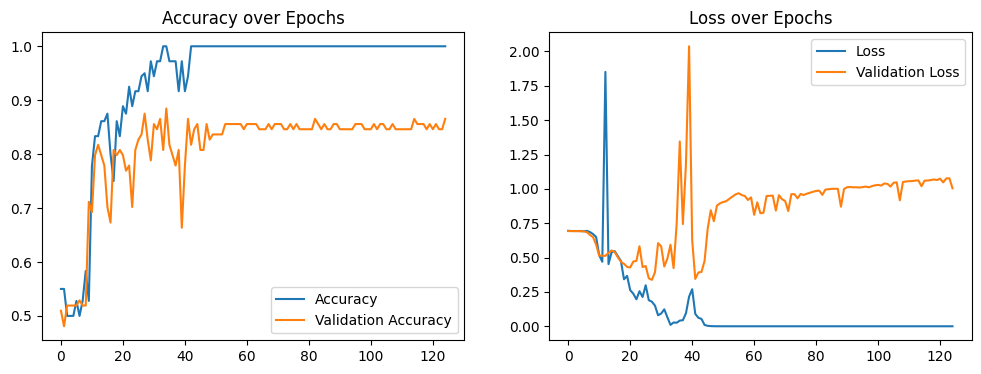

4/4 [==============================] - 10s 1s/step - loss: 1.0571 - accuracy: 0.8585 - precision: 0.8448 - recall: 0.8909
Validation Loss: 1.0570528507232666
Validation Accuracy: 0.8584905862808228
Validation Precision: 0.8448275923728943
Validation Recall: 0.8909090757369995
Validation F1-Score: 0.8672565832636631


In [18]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

# Carregar a arquitetura VGG16 sem os pesos pré-treinados e sem as camadas superiores
base_model = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3))

# Adicionar novas camadas para classificação
x = base_model.output
x = Flatten()(x)  # Achatar os outputs para um vetor
x = Dense(1024, activation='relu')(x)  # Adicionar uma camada densa
predictions = Dense(1, activation='sigmoid')(x)  # Camada de saída para classificação binária

# Construir o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy',
              metrics=[BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall')])

# Treinar o modelo
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train) // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=validation_generator,
                    validation_steps=len(X_test) // BATCH_SIZE)

model.save('vgg16_img_grande_125_epocas_batch_8_zero.h5')


# Plotar o gráfico de treinamento e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Avaliar o modelo com o conjunto de teste
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_test, y_test)

# Calculando o F1-score
val_f1 = f1_score(val_precision, val_recall)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")
print(f"Validation F1-Score: {val_f1}")

Tranferencia de apredizagem:

58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/125
5/5 [==============================] - 3s 336ms/step - loss: 0.8340 - accuracy: 0.4750 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.7276 - val_accuracy: 0.4808 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/125
5/5 [==============================] - 2s 371ms/step - loss: 0.7082 - accuracy: 0.5278 - precision: 1.0000 - recall: 0.1053 - val_loss: 0.6760 - val_accuracy: 0.6058 - val_precision: 0.6129 - val_recall: 0.6909
Epoch 3/125
5/5 [==============================] - 1s 223ms/step - loss: 0.6777 - accuracy: 0.5833 - precision: 0.5357 - recall: 0.8824 - val_loss: 0.6734 - val_accuracy: 0.5288 - val_precision: 0.5196 - val_recall: 1.0000
Epoch 4/125
5/5 [==============================] - 2s 368ms/step - loss: 0.6582 - accuracy: 0.5833 - precision: 0.5833 - recall: 1.0000 - val_loss: 0.6659 - val_accuracy: 0.5192 - val_precision: 0.5146 - val_recall: 1.0000
Epoch 5/125
5/5 [==========

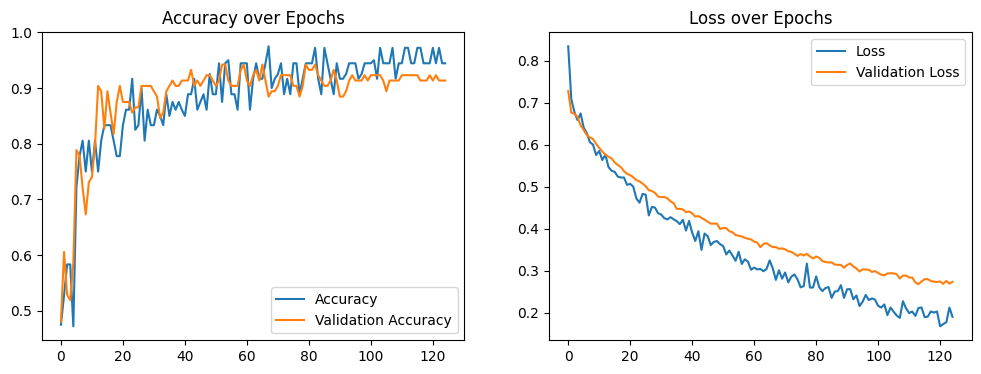

4/4 [==============================] - 1s 120ms/step - loss: 0.2686 - accuracy: 0.9151 - precision: 0.9792 - recall: 0.8545
Validation Loss: 0.2685670256614685
Validation Accuracy: 0.9150943160057068
Validation Precision: 0.9791666865348816
Validation Recall: 0.8545454740524292
Validation F1-Score: 0.9126213292082156


In [19]:
from keras.applications import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam


# Carregar a arquitetura VGG16 sem os pesos pré-treinados e sem as camadas superiores
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar as camadas da VGG16
for layer in base_model.layers:
    layer.trainable = False

# Adicionar novas camadas para classificação
x = base_model.output
x = Flatten()(x)  # Achatar os outputs para um vetor
x = Dense(1024, activation='relu')(x)  # Adicionar uma camada densa
predictions = Dense(1, activation='sigmoid')(x)  # Camada de saída para classificação binária


# Adicionar as camadas personalizadas sobre a base da VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Nova camada FC e ReLU
predictions = Dense(1, activation='sigmoid')(x)  # Nova camada de saída para classificação binária

# Montar o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy',
                  metrics=[BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall')]
)

# Treinar o modelo
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train) // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=validation_generator,
                    validation_steps=len(X_test) // BATCH_SIZE)

model.save('vgg16_img_grande_125_epocas_batch_8_tranfer.h5')

# Plotar o gráfico de treinamento e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Avaliar o modelo com o conjunto de teste
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_test, y_test)

# Calculando o F1-score
val_f1 = f1_score(val_precision, val_recall)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")
print(f"Validation F1-Score: {val_f1}")

##Fine Tuning

Epoch 1/125
5/5 [==============================] - 7s 555ms/step - loss: 0.3293 - accuracy: 0.8333 - precision: 0.9286 - recall: 0.7222 - val_loss: 0.2505 - val_accuracy: 0.9038 - val_precision: 1.0000 - val_recall: 0.8148
Epoch 2/125
5/5 [==============================] - 2s 456ms/step - loss: 0.2702 - accuracy: 0.8333 - precision: 0.7600 - recall: 1.0000 - val_loss: 0.2510 - val_accuracy: 0.9231 - val_precision: 0.9107 - val_recall: 0.9444
Epoch 3/125
5/5 [==============================] - 2s 454ms/step - loss: 0.1205 - accuracy: 0.9167 - precision: 1.0000 - recall: 0.8333 - val_loss: 0.2744 - val_accuracy: 0.8846 - val_precision: 1.0000 - val_recall: 0.7778
Epoch 4/125
5/5 [==============================] - 1s 308ms/step - loss: 0.1122 - accuracy: 0.9444 - precision: 1.0000 - recall: 0.9000 - val_loss: 0.1925 - val_accuracy: 0.9423 - val_precision: 0.9796 - val_recall: 0.9057
Epoch 5/125
5/5 [==============================] - 1s 327ms/step - loss: 0.0892 - accuracy: 1.0000 - precisi

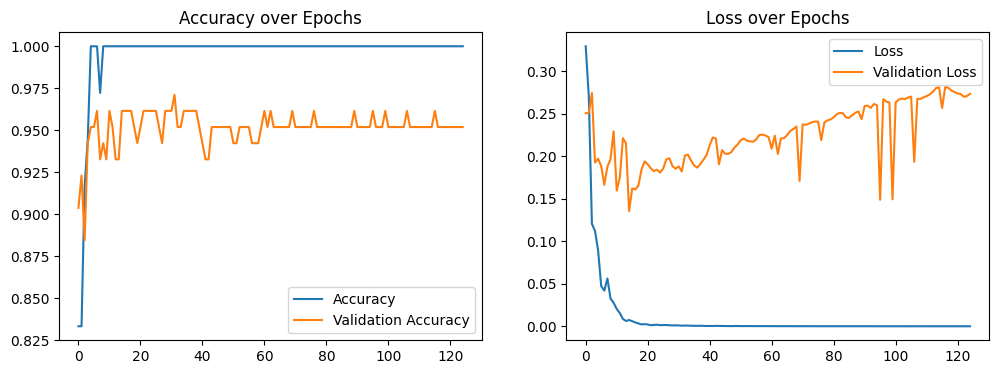

4/4 [==============================] - 1s 109ms/step - loss: 0.2687 - accuracy: 0.9528 - precision: 0.9808 - recall: 0.9273
Validation Loss: 0.26867830753326416
Validation Accuracy: 0.9528301954269409
Validation Precision: 0.9807692170143127
Validation Recall: 0.9272727370262146
Validation F1-Score: 0.9532709767335164


In [20]:
# Descongelar todas as camadas da VGG16 para fine-tuning
for layer in base_model.layers:
    layer.trainable = True

# Recompile o modelo com uma taxa de aprendizado menor
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy',     metrics=[BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall')])


# Treinar o modelo
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train) // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=validation_generator,
                    validation_steps=len(X_test) // BATCH_SIZE)

model.save('vgg16_img_grande_125_epocas_batch_8_fine_turning.h5')

# Plotar o gráfico de treinamento e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Avaliar o modelo com o conjunto de teste
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_test, y_test)

# Calculando o F1-score
val_f1 = f1_score(val_precision, val_recall)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")
print(f"Validation F1-Score: {val_f1}")

Epoch 1/125
5/5 [==============================] - 20s 4s/step - loss: 1.6228e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.3878 - val_accuracy: 0.8750 - val_precision: 0.8254 - val_recall: 0.9630
Epoch 2/125
5/5 [==============================] - 2s 464ms/step - loss: 0.1133 - accuracy: 0.9444 - precision: 1.0000 - recall: 0.8947 - val_loss: 0.8466 - val_accuracy: 0.8654 - val_precision: 1.0000 - val_recall: 0.7455
Epoch 3/125
5/5 [==============================] - 2s 456ms/step - loss: 0.0062 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.0620 - val_accuracy: 0.6538 - val_precision: 0.5955 - val_recall: 1.0000
Epoch 4/125
5/5 [==============================] - 2s 460ms/step - loss: 0.1425 - accuracy: 0.8889 - precision: 0.8095 - recall: 1.0000 - val_loss: 0.3762 - val_accuracy: 0.9327 - val_precision: 0.9796 - val_recall: 0.8889
Epoch 5/125
5/5 [==============================] - 2s 473ms/step - loss: 0.0167 - accuracy: 1.0000 - preci

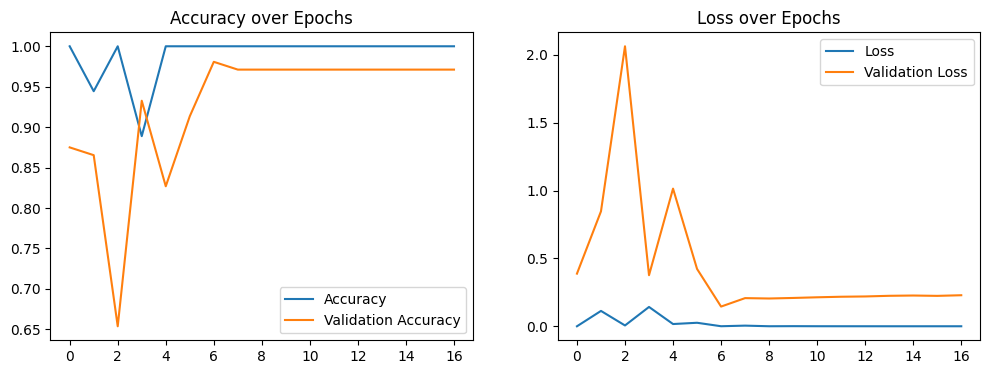

4/4 [==============================] - 1s 113ms/step - loss: 0.2245 - accuracy: 0.9717 - precision: 1.0000 - recall: 0.9455
Validation Loss: 0.22446925938129425
Validation Accuracy: 0.9716981053352356
Validation Precision: 1.0
Validation Recall: 0.9454545378684998
Validation F1-Score: 0.9719625628530398


In [21]:
from keras.metrics import BinaryAccuracy, Precision, Recall
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Descongelar todas as camadas da VGG16 para fine-tuning
for layer in base_model.layers:
    layer.trainable = True

# Recompile o modelo com uma taxa de aprendizado menor
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy',     metrics=[BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall')])


# Treinar o modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
model_checkpoint = ModelCheckpoint(filepath='melhor_modelo_fine_tuning.h5', save_best_only=True, monitor='val_loss', mode='min')

# Adicionar os callbacks no método fit
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(X_test) // BATCH_SIZE,
    callbacks=[early_stopping, model_checkpoint]
)

model.save('vgg16_img_grande_125_epocas_batch_8_fine_turning.h5')

# Plotar o gráfico de treinamento e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Avaliar o modelo com o conjunto de teste
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_test, y_test)

# Calculando o F1-score
val_f1 = f1_score(val_precision, val_recall)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")
print(f"Validation F1-Score: {val_f1}")